# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 8.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    {\nabla_{w} Q(w)} = \dfrac{2}{\ell} (w^TX^TX - y^TX)^T = \dfrac{2}{\ell} ((w^TX^T - y^T)X)^T = \dfrac{2}{\ell} (X^T(Xw - y))
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [173]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [175]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [176]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [177]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/run-report/73494012/


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/run-report/73503384/


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/run-report/73505987/


* **Adam**: https://contest.yandex.ru/contest/41257/run-report/73503837/


* **LinearRegression**: https://contest.yandex.ru/contest/41257/run-report/73547433/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [178]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 12
sns.set(style='darkgrid')

In [179]:
data = pd.read_csv('autos.csv')

In [180]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [181]:
data['price'].describe()

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

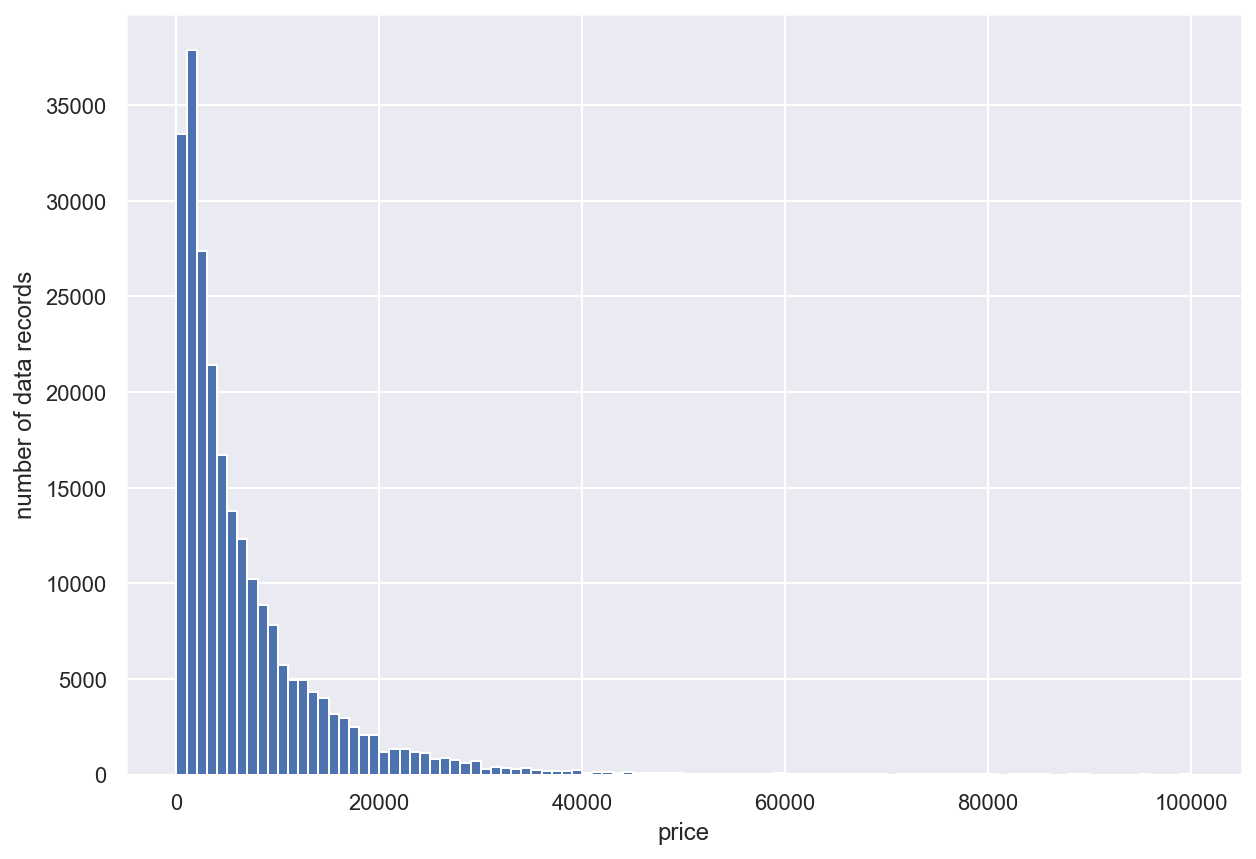

In [182]:
plt.hist(data['price'], bins=100)
plt.xlabel('price')
plt.ylabel('number of data records')
plt.show()

Значения переменной довольно большие, поэтому можно взять log_price

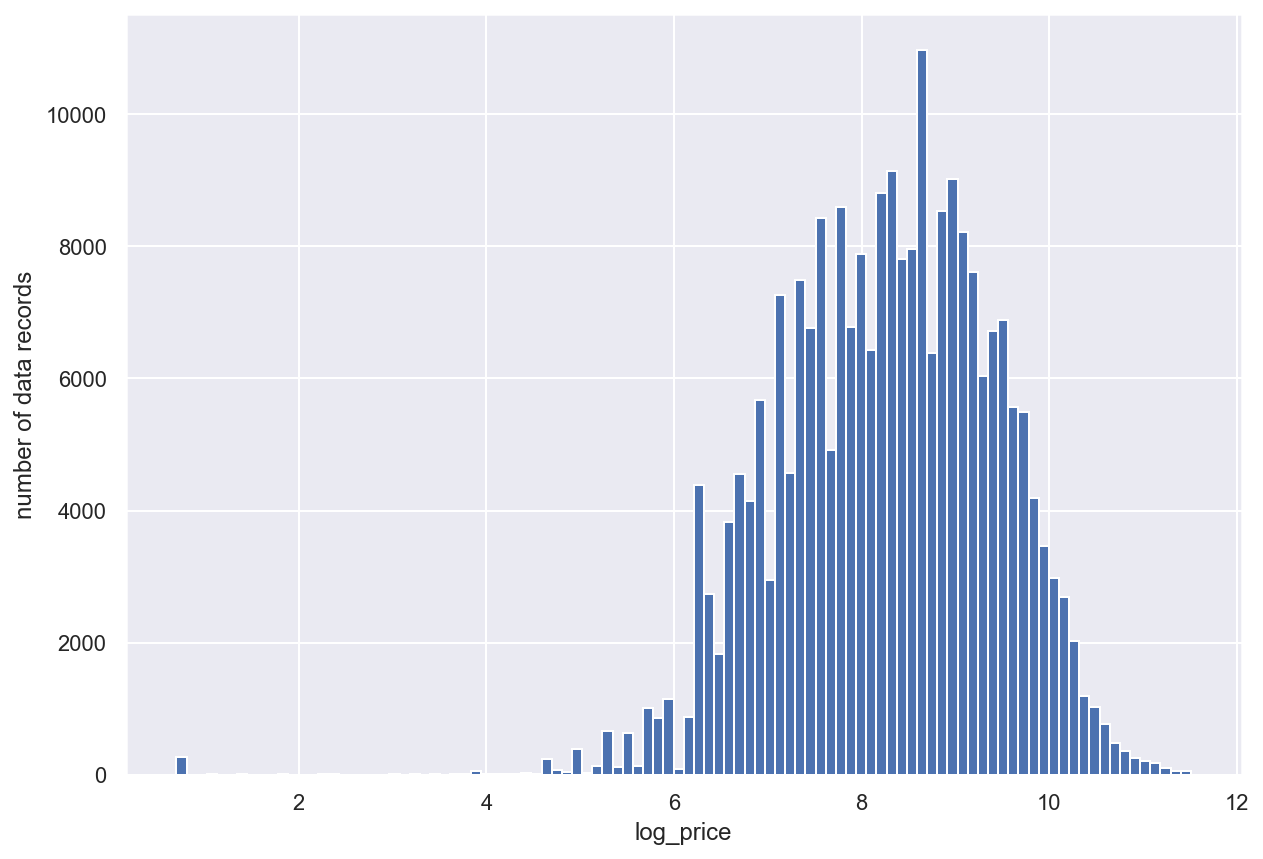

In [183]:
data['log_price'] = np.log1p(data['price'].values)
plt.hist(data['log_price'], bins=100)
plt.xlabel('log_price')
plt.ylabel('number of data records')
plt.show()

In [184]:
categorical = ['brand', 'vehicleType', 'fuelType', 'model']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

### Other features

In [185]:
# переводим бинарные признаки в 0 1

data.loc[data['gearbox'] == 'manuell', 'gearbox'] = 0
data.loc[data['gearbox'] == 'automatik', 'gearbox'] = 1

data.loc[data['notRepairedDamage'] == 'nein', 'notRepairedDamage'] = 0
data.loc[data['notRepairedDamage'] == 'ja', 'notRepairedDamage'] = 1

In [186]:
from sklearn.model_selection import train_test_split

data['bias'] = 1
other += ['bias']

X = data[categorical + numeric + other]
y = data['log_price']

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=10)

In [187]:
# убираем выбросы

X_train['log_price'] = y_train
X_train = X_train[X_train.log_price > 4]
y_train = X_train['log_price']
X_train.drop(columns=['log_price'])

,brand,vehicleType,fuelType,model,powerPS,kilometer,autoAgeMonths,gearbox,notRepairedDamage,bias
197401,smart,cabrio,benzin,fortwo,54,150000,186,1,0,1
100013,jeep,suv,benzin,andere,120,100000,404,0,0,1
107270,volkswagen,kleinwagen,diesel,polo,90,100000,40,0,0,1
124932,audi,cabrio,benzin,andere,256,125000,119,1,0,1
10810,mitsubishi,bus,benzin,andere,122,150000,292,0,1,1
...,...,...,...,...,...,...,...,...,...,...
93553,mercedes_benz,suv,diesel,m_klasse,250,150000,160,1,0,1
181568,peugeot,kombi,diesel,3_reihe,136,150000,144,0,0,1
94735,bmw,limousine,benzin,1er,116,150000,129,0,0,1
236669,volvo,kombi,benzin,v40,115,150000,211,0,0,1


## Categorical features

### `brand`

In [188]:
X_train['brand'].value_counts()

volkswagen       39256
bmw              23311
mercedes_benz    20328
audi             19024
opel             19012
ford             12585
renault           8425
peugeot           5867
fiat              4509
seat              3443
skoda             3441
mazda             3102
toyota            2792
citroen           2699
nissan            2630
mini              2249
hyundai           2172
smart             2070
volvo             1948
mitsubishi        1575
honda             1482
kia               1443
porsche           1342
alfa_romeo        1274
suzuki            1210
chevrolet         1001
chrysler           768
dacia              552
land_rover         486
jeep               462
subaru             397
jaguar             374
daihatsu           344
saab               314
daewoo             237
lancia             224
rover              196
lada               106
Name: brand, dtype: int64

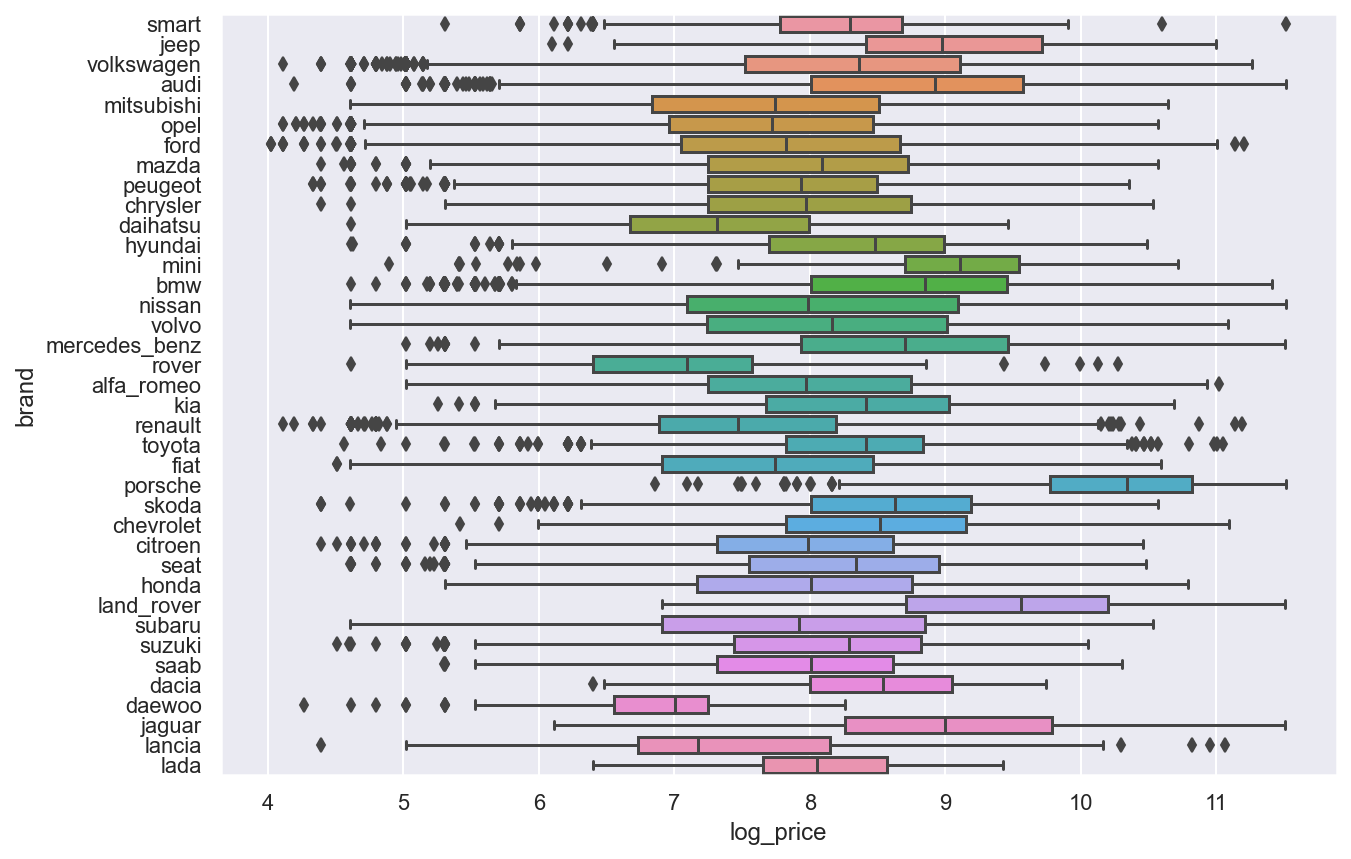

In [189]:
sns.boxplot(y=X_train['brand'], x=y_train)
plt.show()

In [190]:
### `model`

In [191]:
X_train['model'].value_counts()

golf          16066
andere        14609
3er           12003
a4             6017
passat         5739
              ...  
elefantino        3
samara            2
rangerover        2
serie_3           2
serie_2           1
Name: model, Length: 248, dtype: int64

In [192]:
dtp = X_train.groupby(['model']).agg({'log_price': 'mean'}).reset_index()
dtp.describe()

,log_price
count,248.000000
mean,8.398915
std,0.922048
min,5.535170
25%,7.730124
50%,8.390929
75%,9.103794
max,10.737439


[Text(0.5, 1.0, 'Mean price for car mideks')]

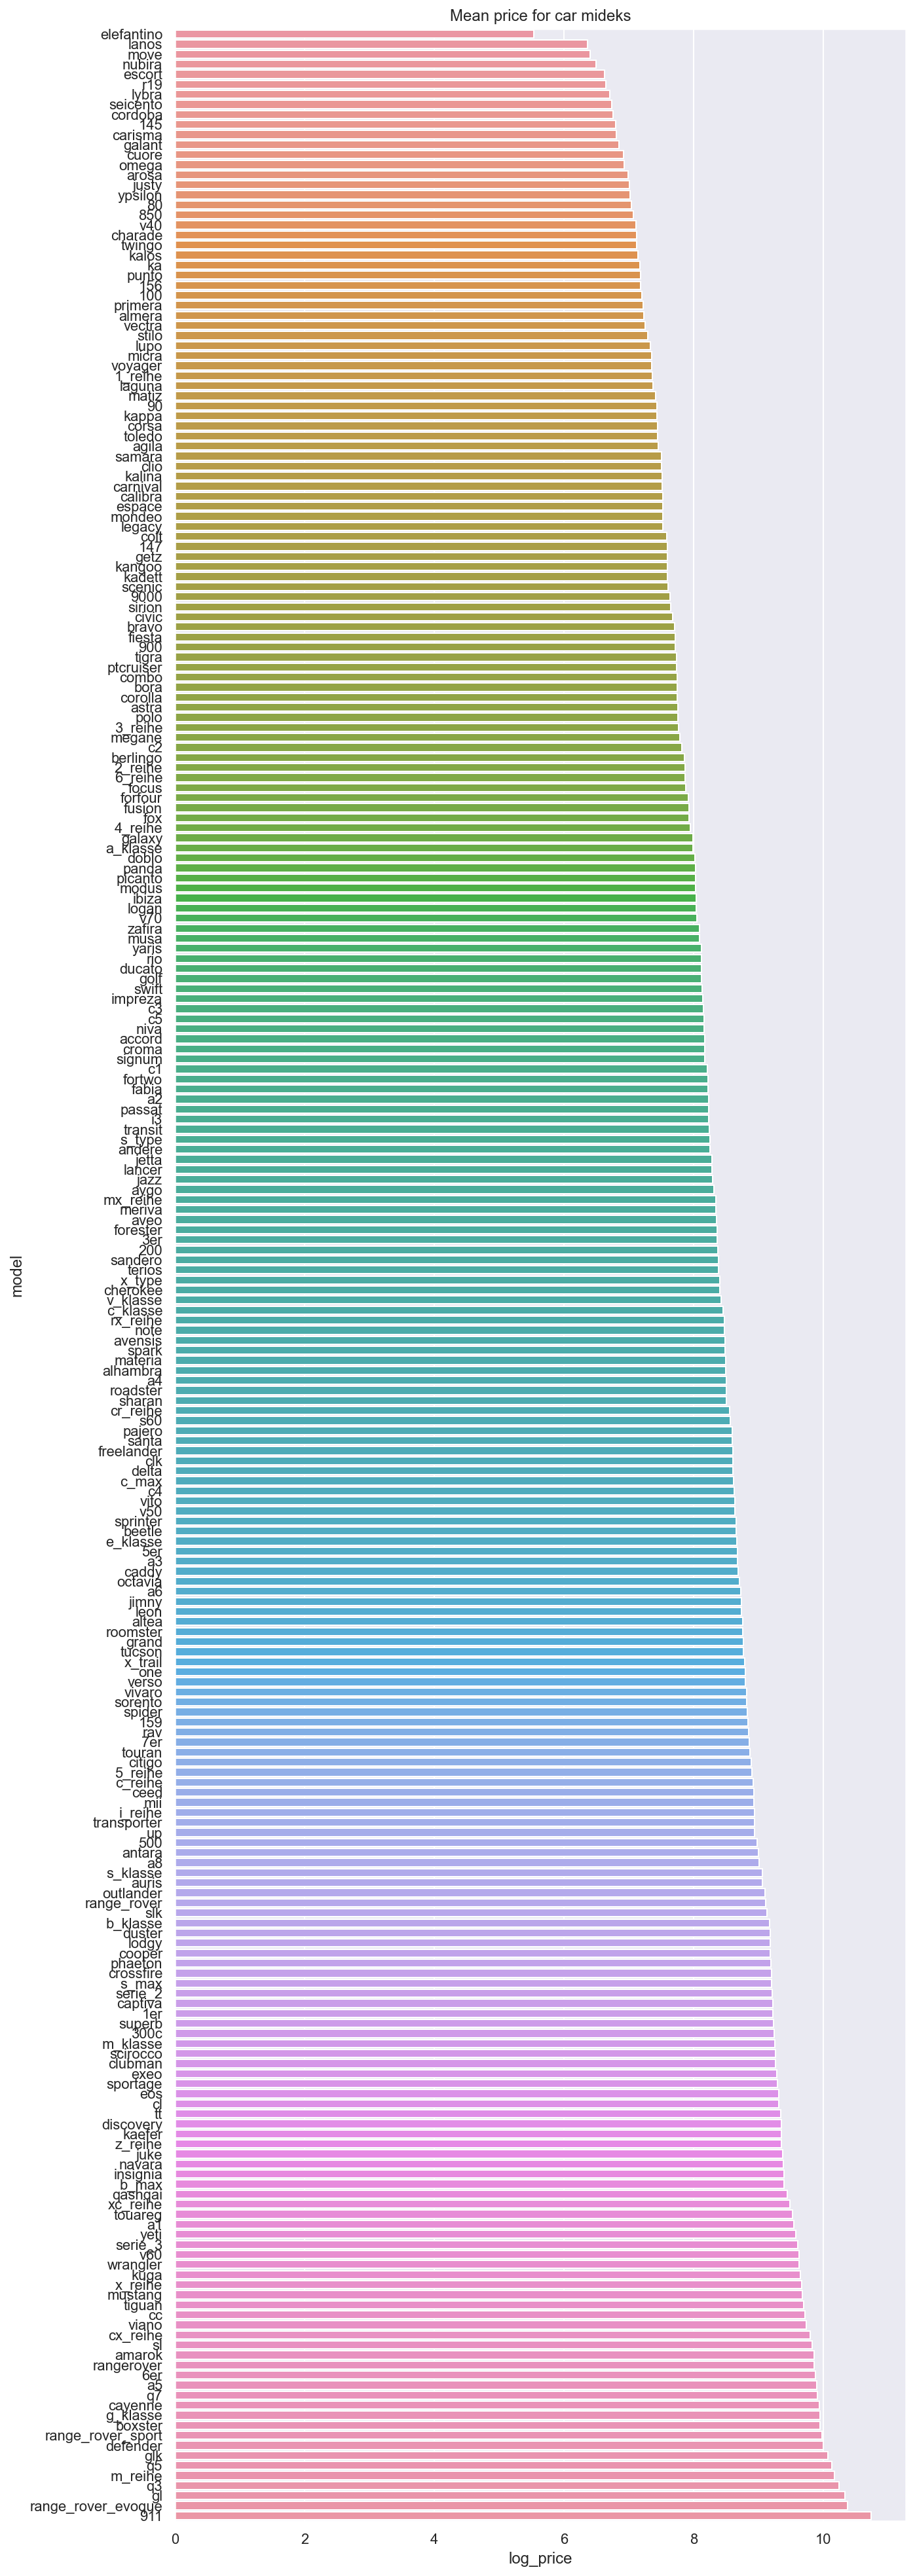

In [193]:
dtp.sort_values(by='log_price', inplace=True)

plt.rcParams['figure.figsize']=(10,35)
sns.barplot(data=dtp, x="log_price", y="model").set(title='Mean price for car mideks')


Мда значений конечно много разных, но наверное их всех стоит оставить(я не уверен, что их можно обьединять, поскольку они к brand_ам привязаны) + они все примерно одинаково распределены(нельзя явно выявить какие то классы или сегменты моделей). Но можно попробовать соединить признаки бренда и модели.

In [194]:
X_train['name'] = X_train['model'] + '_' + X_train['brand']
X_val['name'] = X_val['model'] + '_' + X_val['brand']
X_test['name'] = X_test['model'] + '_' + X_test['brand']

categorical = ['vehicleType', 'fuelType', 'name']

In [195]:
plt.rcParams['figure.figsize'] = 10, 7



### `vehicleType`

In [196]:
X_train['vehicleType'].value_counts()

limousine     57932
kombi         40584
kleinwagen    39853
bus           18910
cabrio        14115
coupe         10869
suv            9211
andere         1176
Name: vehicleType, dtype: int64

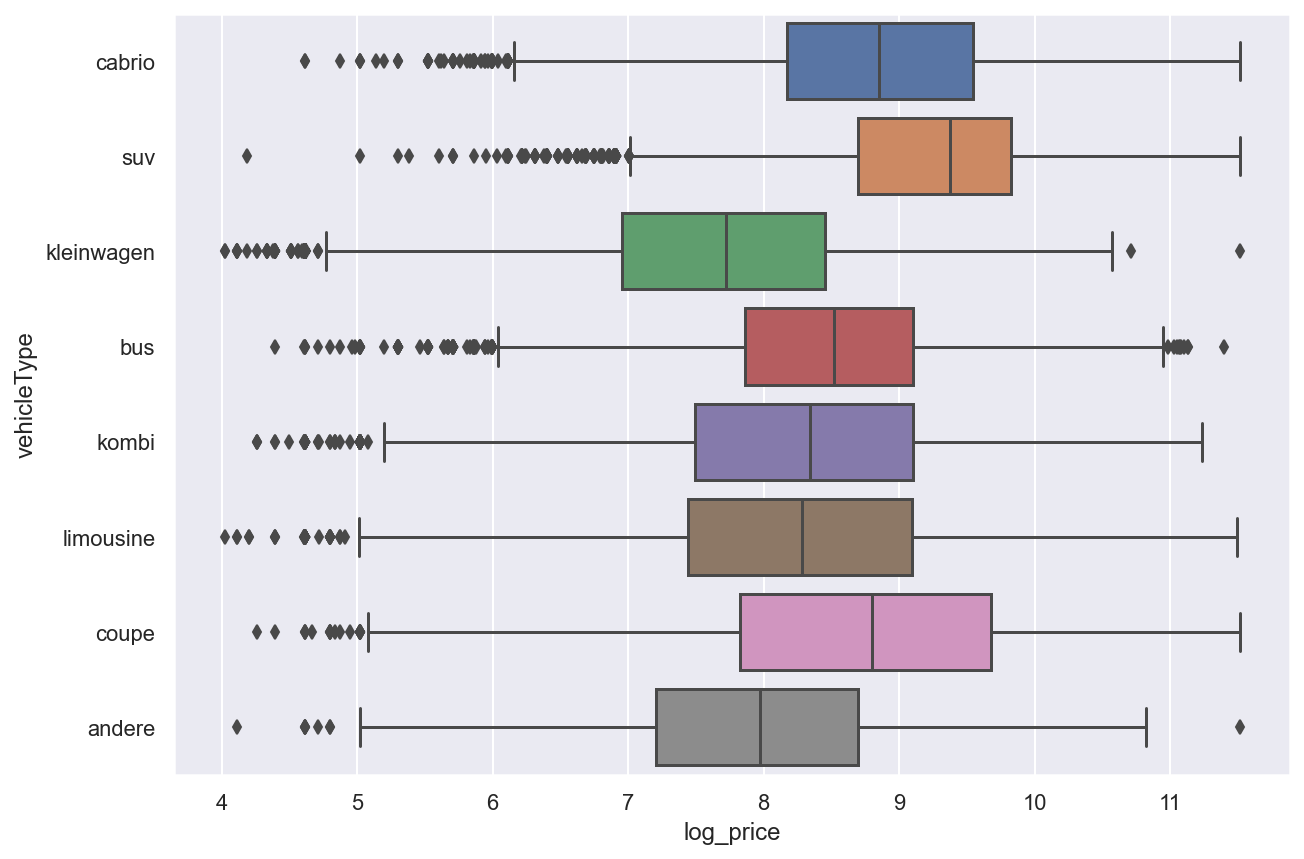

In [197]:
sns.boxplot(y=X_train['vehicleType'], x=y_train)
plt.show()

### `fuelType`

In [198]:
X_train['fuelType'].value_counts()

benzin     122648
diesel      66514
lpg          2933
cng           341
hybrid        166
andere         25
elektro        23
Name: fuelType, dtype: int64

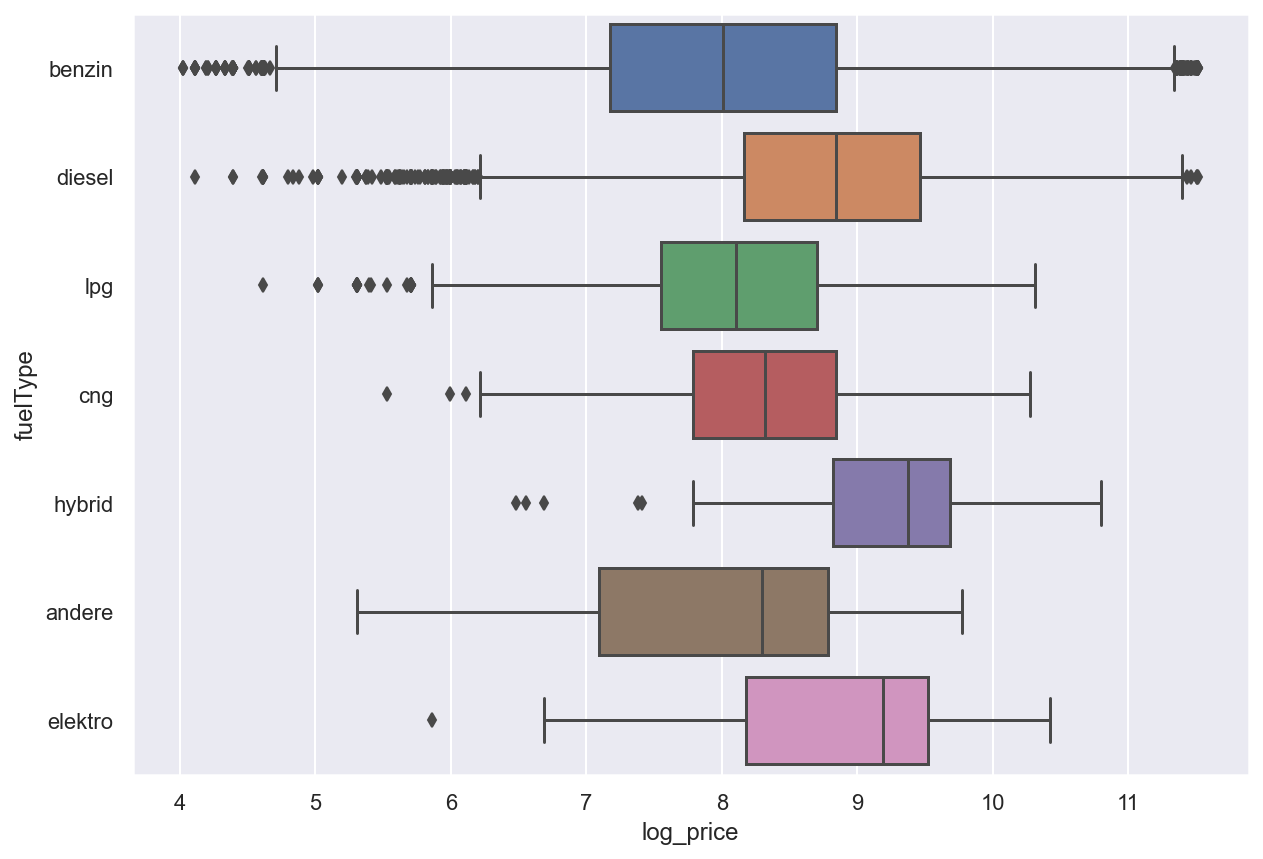

In [199]:
sns.boxplot(y=X_train['fuelType'], x=y_train)
plt.show()

Ну кажется можно обьединить некоторые признаки в 1, но они распределены как-то не оч равномерно

## Numeric features

Построим графики зависимостей численных признаков от переменной

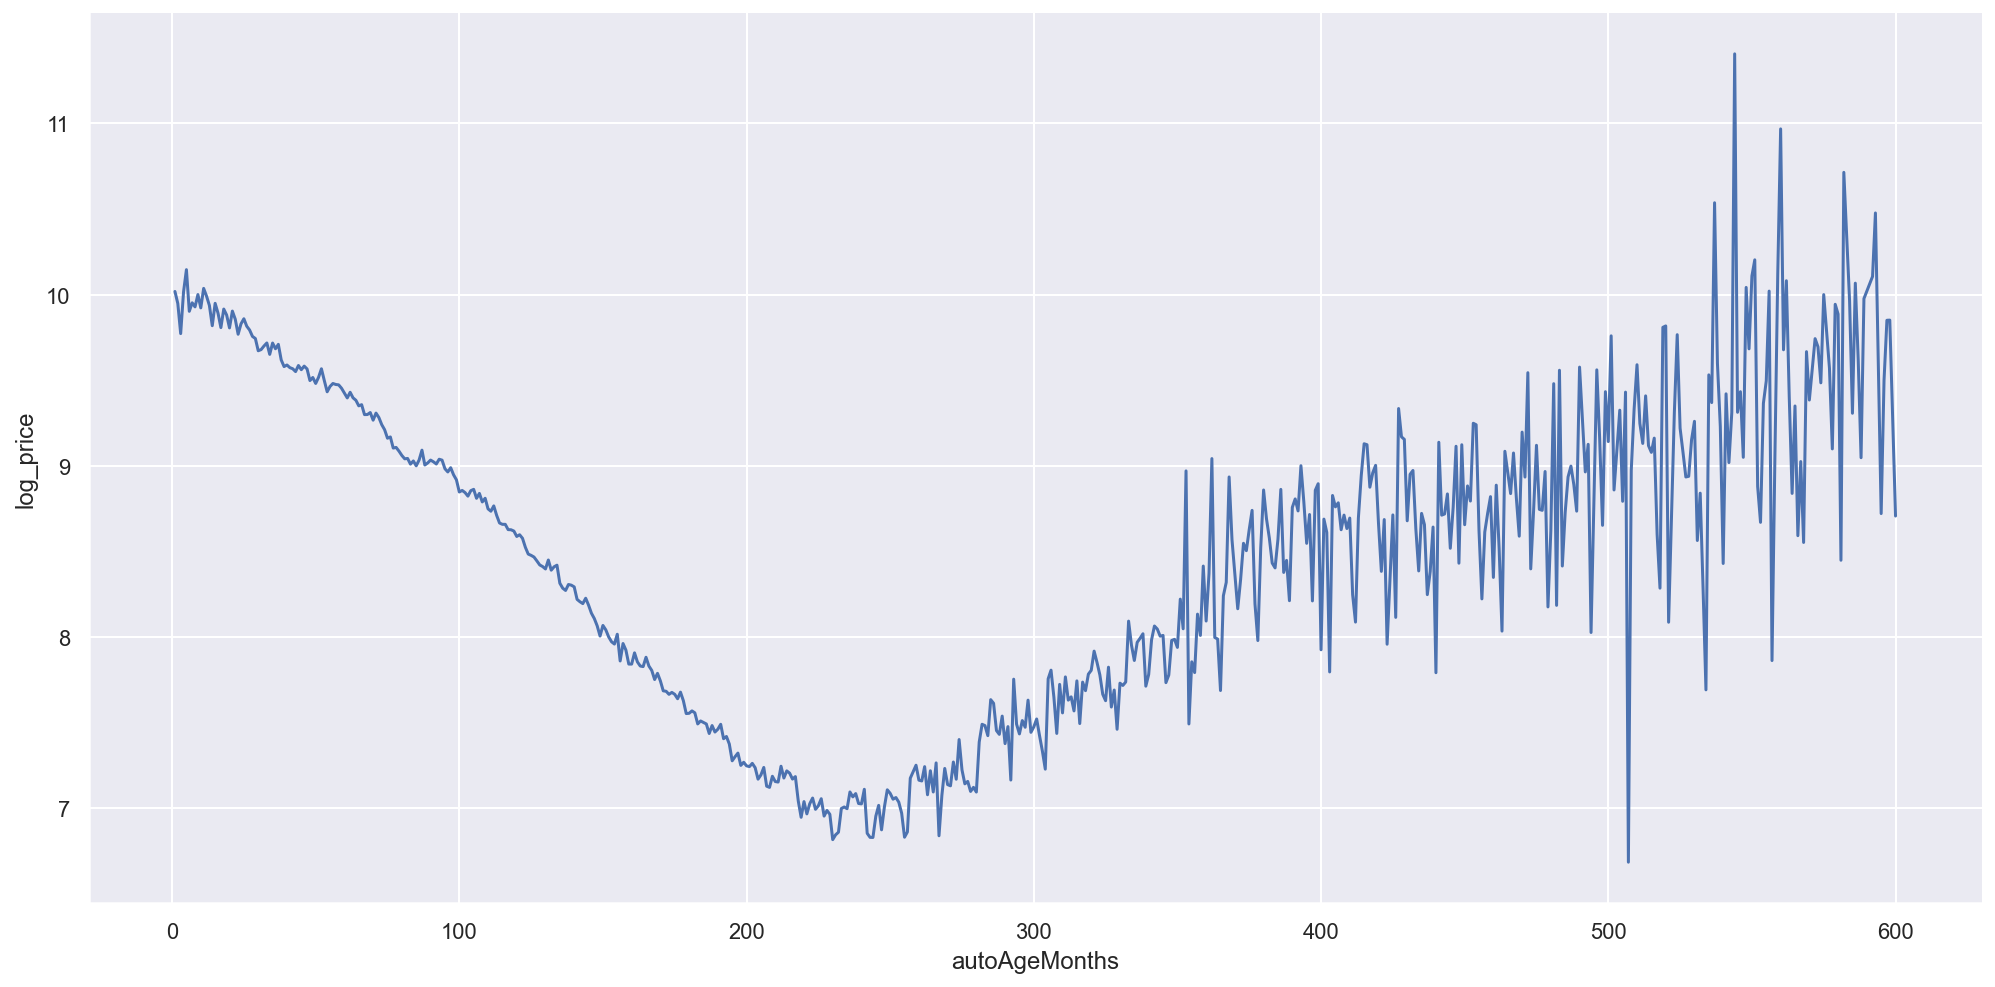

In [200]:
dtp = X_train.groupby(['autoAgeMonths']).agg({'log_price': 'mean'}).reset_index()
sns.relplot(x=dtp['autoAgeMonths'], y=dtp['log_price'], kind='line', aspect=2, height=7)
plt.show()

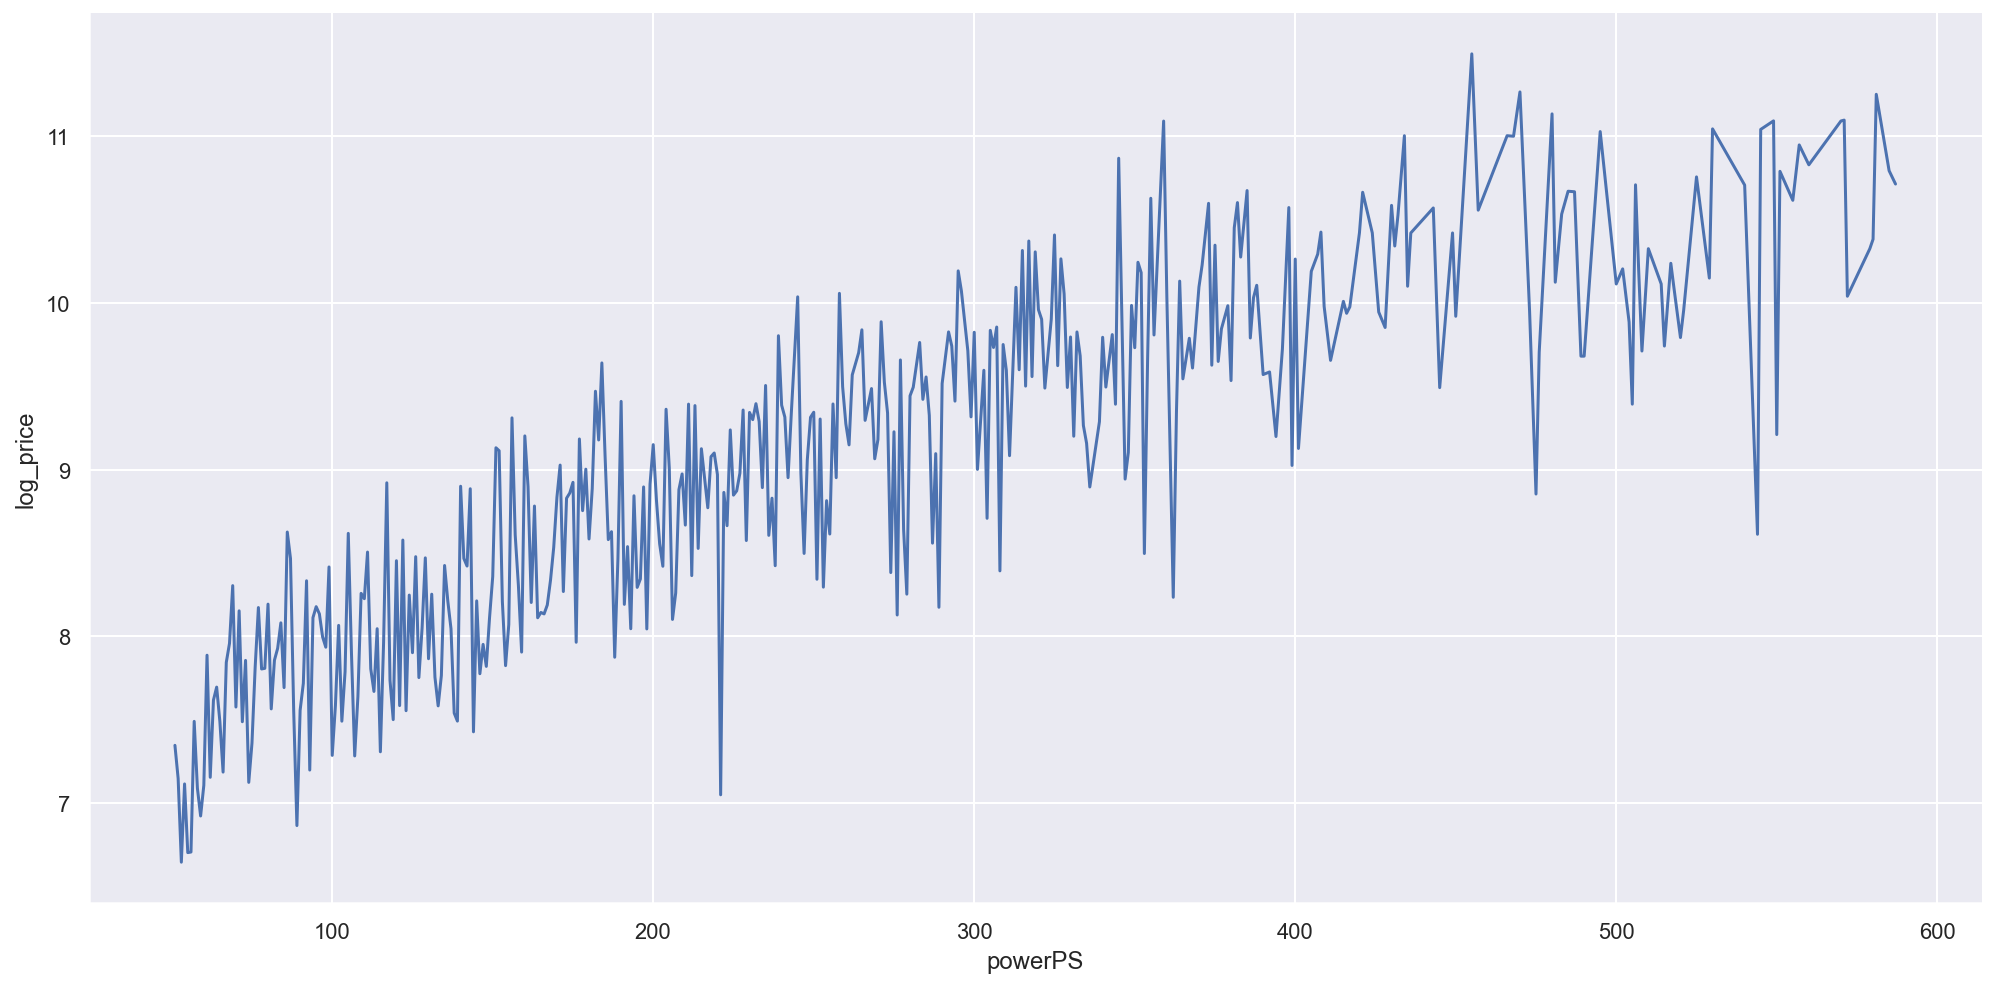

In [201]:
dtp = X_train.groupby(['powerPS']).agg({'log_price': 'mean'}).reset_index()
sns.relplot(x=dtp['powerPS'], y=dtp['log_price'], kind='line', aspect=2, height=7)
plt.show()

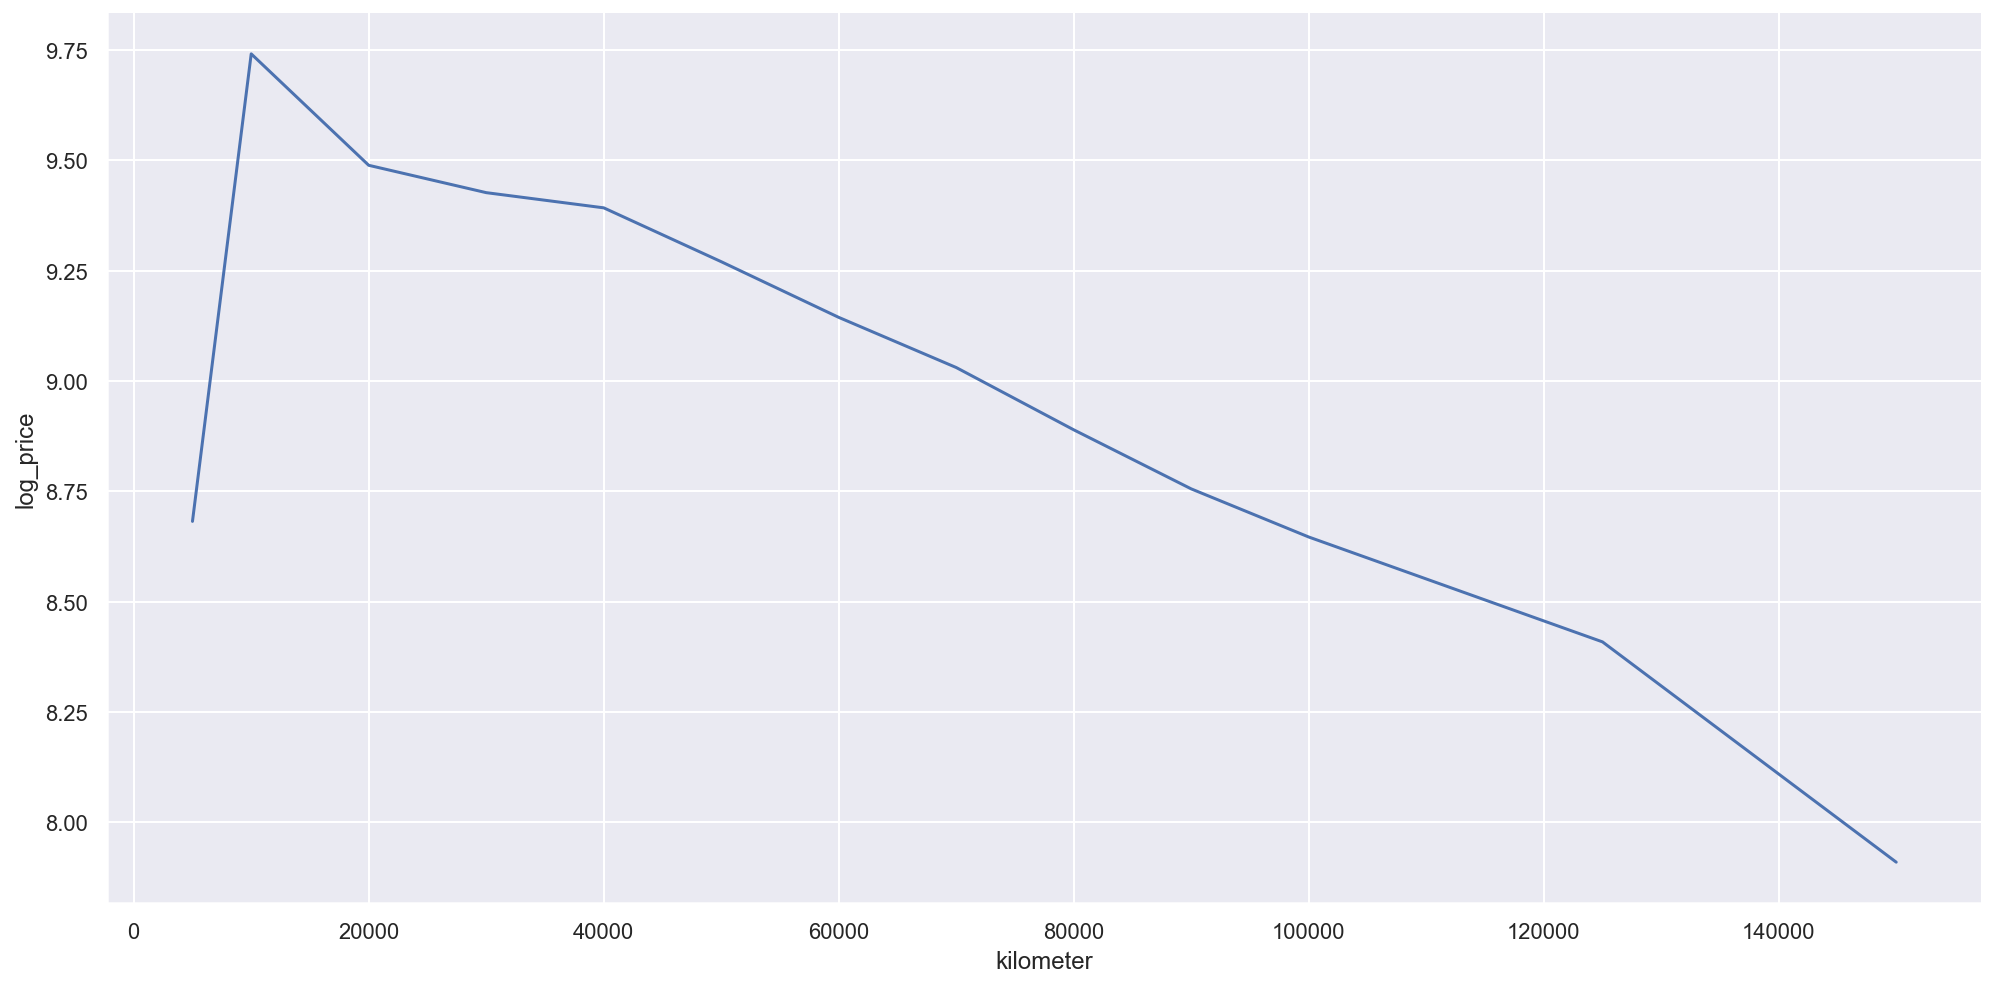

In [202]:
dtp = X_train.groupby(['kilometer']).agg({'log_price': 'mean'}).reset_index()
sns.relplot(x=dtp['kilometer'], y=dtp['log_price'], kind='line', aspect=2, height=7)
plt.show()

In [204]:
categorical

['vehicleType', 'fuelType', 'name']

In [205]:
X_train

,brand,vehicleType,fuelType,model,powerPS,kilometer,autoAgeMonths,gearbox,notRepairedDamage,bias,log_price,name
197401,smart,cabrio,benzin,fortwo,54,150000,186,1,0,1,7.783641,fortwo_smart
100013,jeep,suv,benzin,andere,120,100000,404,0,0,1,8.507345,andere_jeep
107270,volkswagen,kleinwagen,diesel,polo,90,100000,40,0,0,1,9.159152,polo_volkswagen
124932,audi,cabrio,benzin,andere,256,125000,119,1,0,1,9.384378,andere_audi
10810,mitsubishi,bus,benzin,andere,122,150000,292,0,1,1,5.707110,andere_mitsubishi
...,...,...,...,...,...,...,...,...,...,...,...,...
93553,mercedes_benz,suv,diesel,m_klasse,250,150000,160,1,0,1,8.389587,m_klasse_mercedes_benz
181568,peugeot,kombi,diesel,3_reihe,136,150000,144,0,0,1,7.048386,3_reihe_peugeot
94735,bmw,limousine,benzin,1er,116,150000,129,0,0,1,8.101981,1er_bmw
236669,volvo,kombi,benzin,v40,115,150000,211,0,0,1,7.170888,v40_volvo


In [206]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.fit_transform(X_val)
X_test = column_transformer.fit_transform(X_test)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

full 3.088843596477485
stochastic 0.7543120063354622
momentum 1.2067926406393288
adam 2.44205309454865


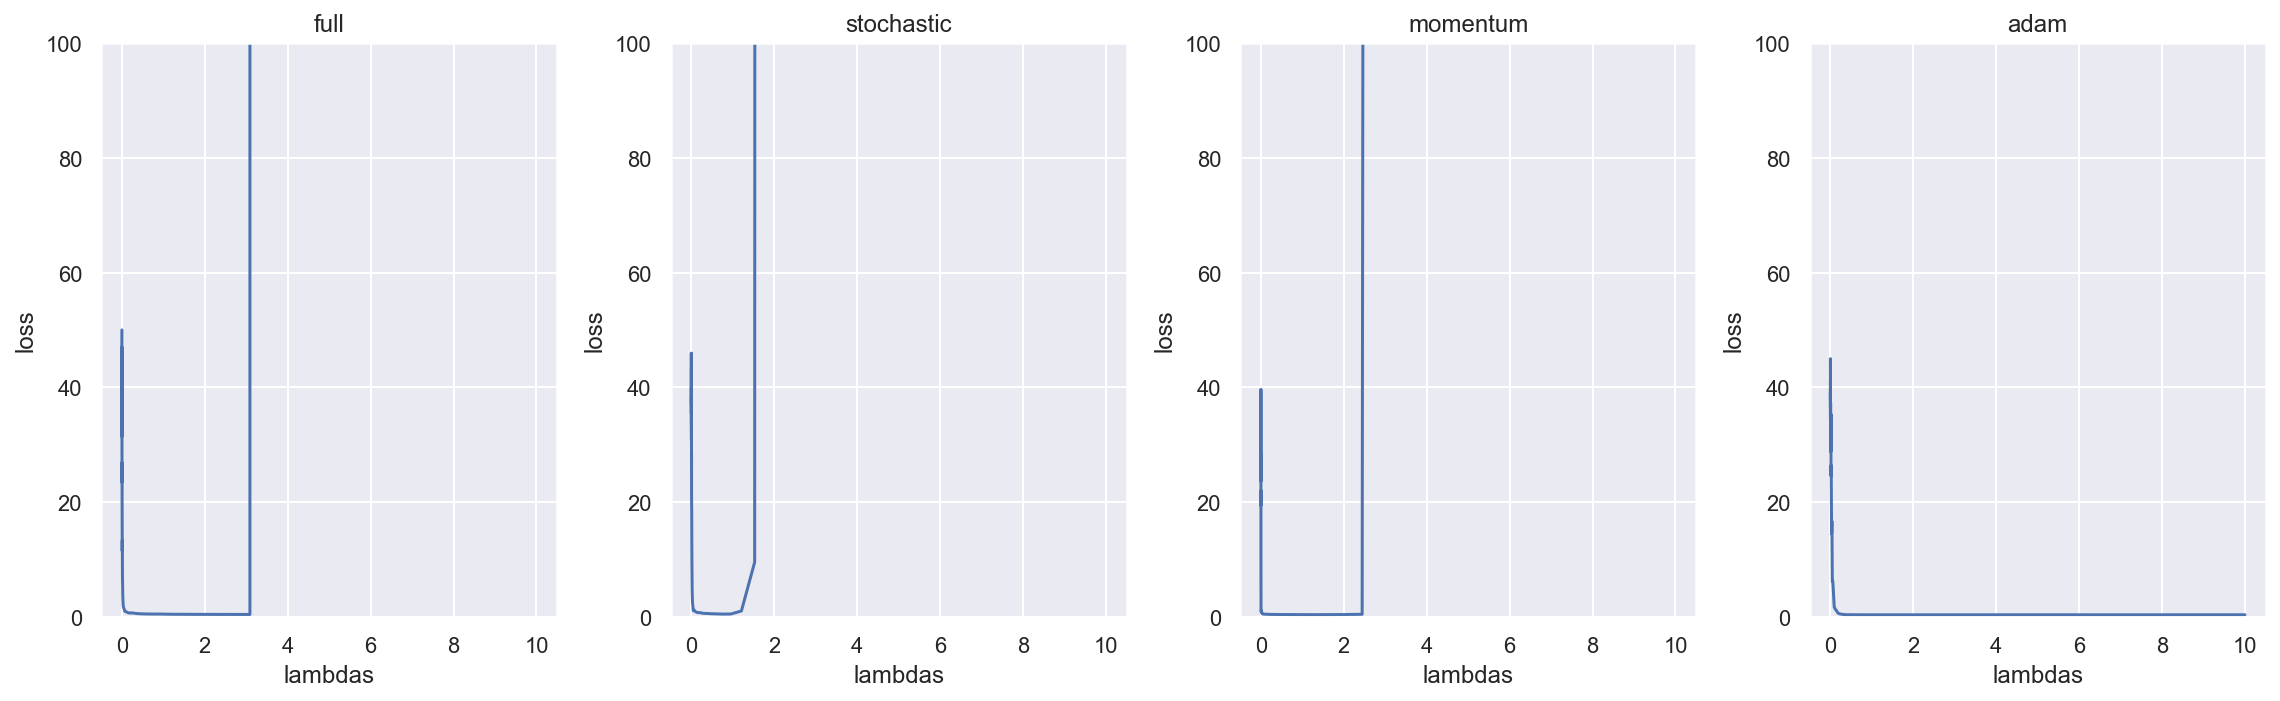

In [207]:
max_iter = 100
tolerance = 0

lambdas = np.logspace(-4, 1, 50)
best_lambdas = {}

fig, axs = plt.subplots(figsize=(16, 5), ncols=4)
i = 0
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    loss_list = []
    best_lambda = 1
    min_loss = 777
    for lambda_ in lambdas:
        descent_config = {
            'kwargs': {
                'dimension': X_val.shape[1],
                'lambda_': lambda_
            }
        }
        descent_config['descent_name'] = descent_name


        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )
        
        regression.fit(X_val, np.array(y_val))
        loss = regression.calc_loss(X_val, np.array(y_val))
        if loss < min_loss:
            best_lambda = lambda_
            min_loss = loss
        loss_list.append(loss)

    best_lambdas[descent_name] = best_lambda
    axs[i].plot(lambdas, loss_list)
    axs[i].set_xlabel('lambdas')
    axs[i].set_ylabel('loss')
    axs[i].set_ylim([0, 100])
    axs[i].set_title(descent_name)
    i += 1
    print(descent_name, best_lambda)
    
plt.tight_layout() 

In [211]:
max_iter = 5000
tolerance = 10 ** -10

iters_train = {}
iters_test = {}

losses_train = {}
losses_test = {}

preds_train = {}
preds_test = {}


progress = 0

print('train')



for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_lambda = best_lambdas[descent_name]
    descent_config = {
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambda
        }
    }
    descent_config['descent_name'] = descent_name
    
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    regression.fit(X_train, np.array(y_train))
    iters_train[descent_name] = len(regression.loss_history) - 1
    losses_train[descent_name] = regression.loss_history[-1]
    preds_train[descent_name] = regression.predict(X_train)
    
    print('done')


print('test')

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_lambda = best_lambdas[descent_name]
    descent_config = {
        'kwargs': {
            'dimension': X_test.shape[1],
            'lambda_': best_lambda
        }
    }
    descent_config['descent_name'] = descent_name
    
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    regression.fit(X_test, np.array(y_test))
    iters_test[descent_name] = len(regression.loss_history) - 1
    losses_test[descent_name] = regression.loss_history[-1]    
    preds_test[descent_name] = regression.predict(X_test)

    print('done')
 




train
done
done
done
done
test
done
done
done
done


In [213]:
from sklearn.metrics import r2_score

### Train

In [216]:
train = pd.DataFrame()
train['name'] = ['full', 'stochastic', 'momentum', 'adam']
train['iters'] = 0
train['loss'] = 0
train['r2_score'] = 0

for name in ['full', 'stochastic', 'momentum', 'adam']:
    train.loc[train['name'] == name, 'iters'] = iters_train[name]
    train.loc[train['name'] == name, 'loss'] = losses_train[name]    
    train.loc[train['name'] == name, 'r2_score'] = r2_score(y_train, preds_train[name])

In [217]:
train

,name,iters,loss,r2_score
0,full,5000,0.277346,0.778797
1,stochastic,5000,0.307823,0.754490
2,momentum,5000,0.268553,0.785810
3,adam,245,0.266514,0.787436


### Test

In [220]:
test = pd.DataFrame()
test['name'] = ['full', 'stochastic', 'momentum', 'adam']
test['iters'] = 0
test['loss'] = 0
test['r2_score'] = 0

for name in ['full', 'stochastic', 'momentum', 'adam']:
    test.loc[test['name'] == name, 'iters'] = iters_test[name]
    test.loc[test['name'] == name, 'loss'] = losses_test[name]    
    test.loc[test['name'] == name, 'r2_score'] = r2_score(y_test, preds_test[name])

In [221]:
test

,name,iters,loss,r2_score
0,full,5000,0.335974,0.747770
1,stochastic,5000,0.369440,0.722645
2,momentum,5000,0.326209,0.755101
3,adam,244,0.323266,0.757310


Почему max_iter = 5000 и tolerance = 10 ** -10(так сказали авторитетные источники) + я тестил на max_iter = 10000, но все кроме `adam` не сходится. Вот пруф, кстати это еще резы до того, как я обьединил признаки `model` и `brand`.

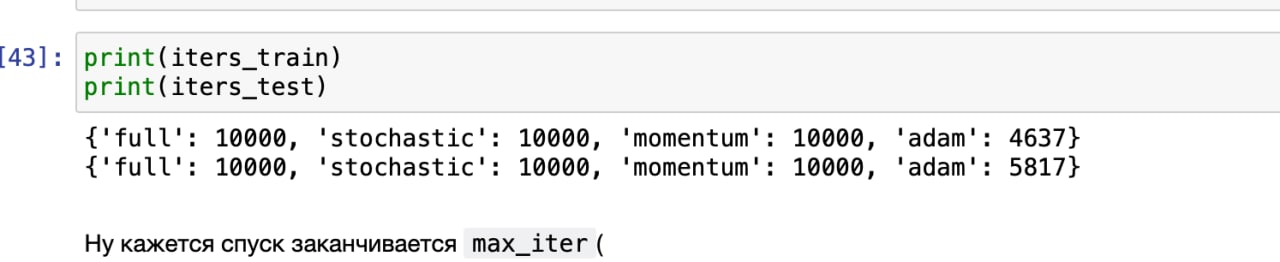

In [224]:
from IPython.display import Image
Image(filename='iters.jpg')

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [222]:
max_iter = 400
tolerance = 0

loss_histories = []

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_lambda = best_lambdas[descent_name]
    descent_config = {
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambda
        }
    }
    descent_config['descent_name'] = descent_name
    
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    regression.fit(X_train, np.array(y_train))
    loss_histories.append(regression.loss_history)


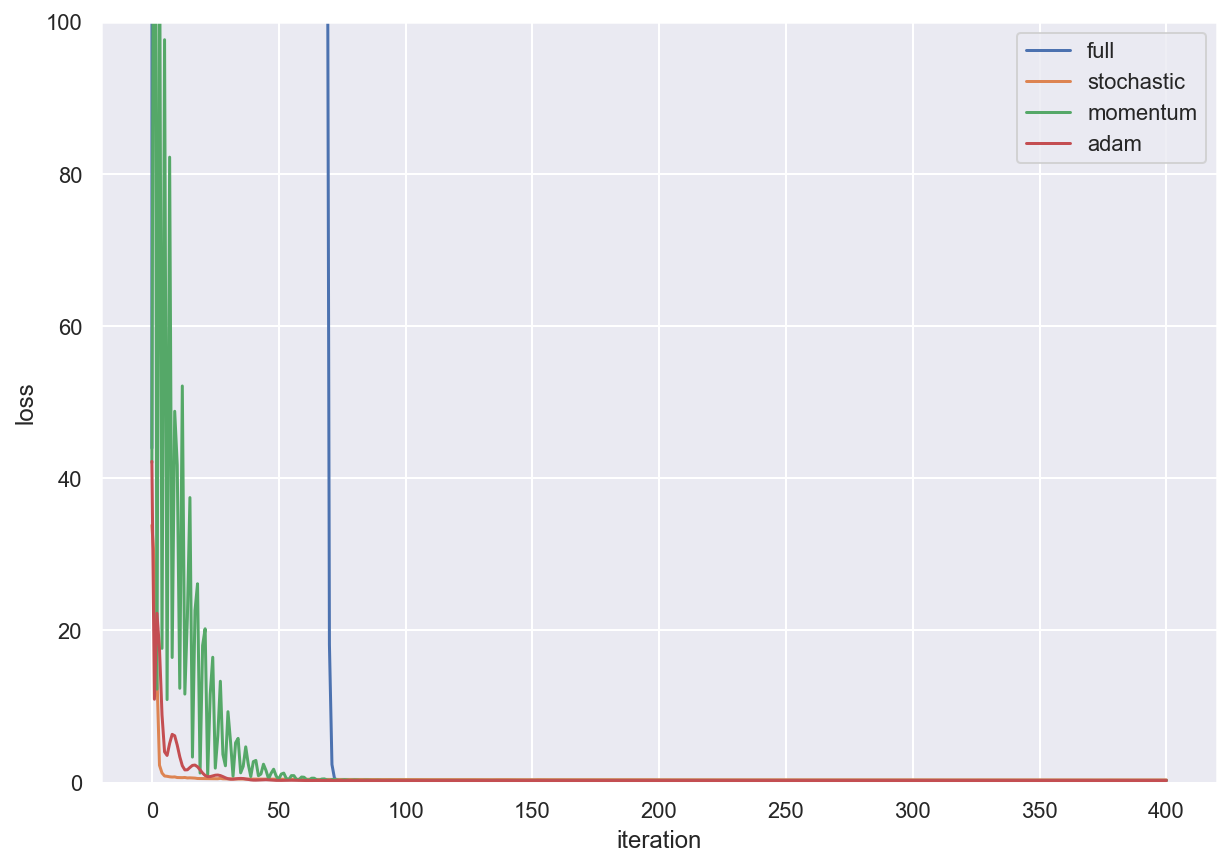

In [225]:
for loss_history in loss_histories:
    plt.plot(loss_history)
plt.ylim(0, 100)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['full', 'stochastic', 'momentum', 'adam'])
plt.show()

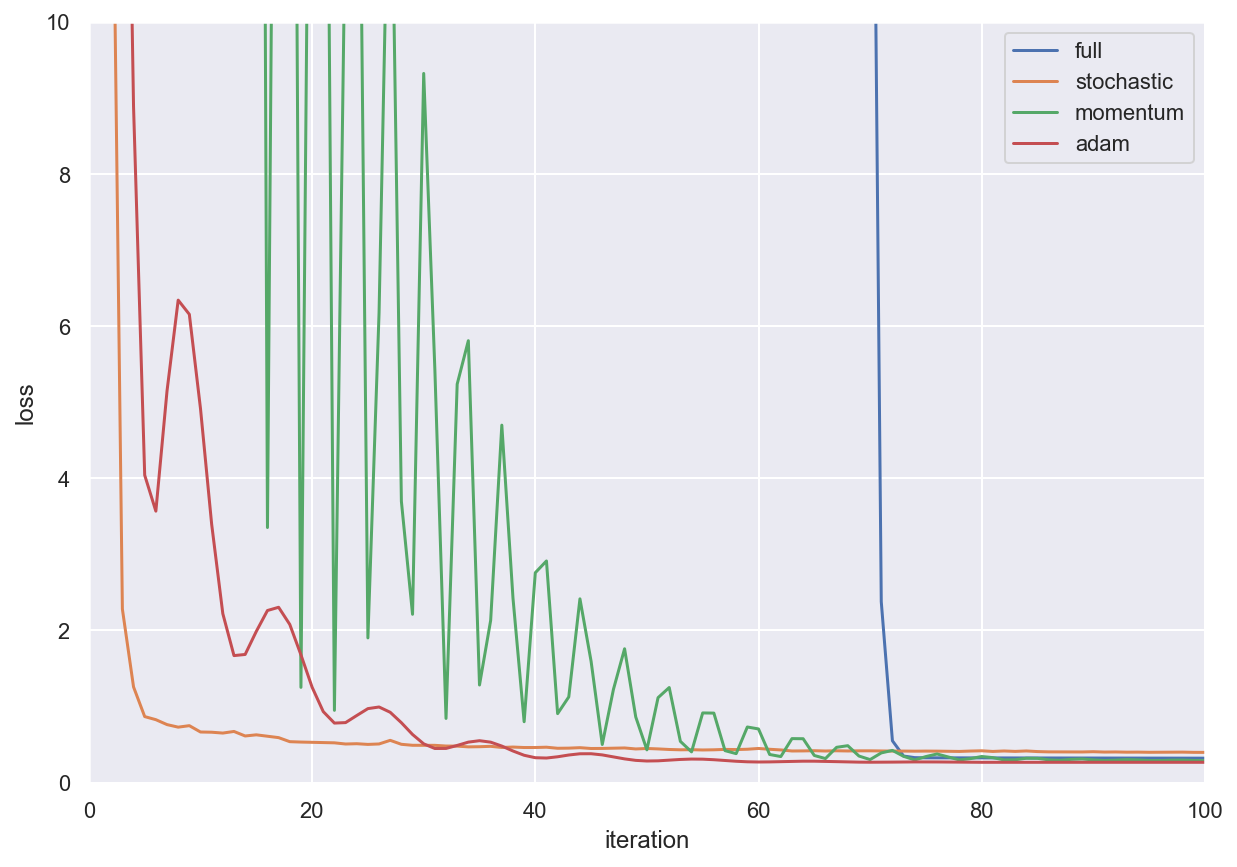

In [228]:
for loss_history in loss_histories:
    plt.plot(loss_history)
plt.ylim(0, 10)
plt.xlim(0, 100)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['full', 'stochastic', 'momentum', 'adam'])
plt.show()

Ну кажется стохастический сходится быстрее всего, однако он не приближается к 0, что скорее всего связано с размером батча(ну мы в следущем задании это изучим). 

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [229]:
import time
batch_sizes = np.arange(5, 500, 10)

max_iter = 100

iters = []
losses = []
times = []


for batch_size in batch_sizes:
    it = 0.
    timeful = 0.
    loss = 0.
    for i in range(10):
        timee = time.time()
        descent_name = 'stochastic'
        best_lambda = best_lambdas[descent_name]
        descent_config = {
            'kwargs': {
                'dimension': X_train.shape[1],
                'batch_size': batch_size,
                'lambda_': best_lambda
            }
        }
        descent_config['descent_name'] = descent_name

        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter
        )
        
        regression.fit(X_train, np.array(y_train))
        it += len(regression.loss_history) - 1
        loss += regression.loss_history[-1]
        timeful += time.time() - timee
    it /= 10
    loss /= 10
    timeful /= 10
    iters.append(it)
    losses.append(loss)
    times.append(timeful)

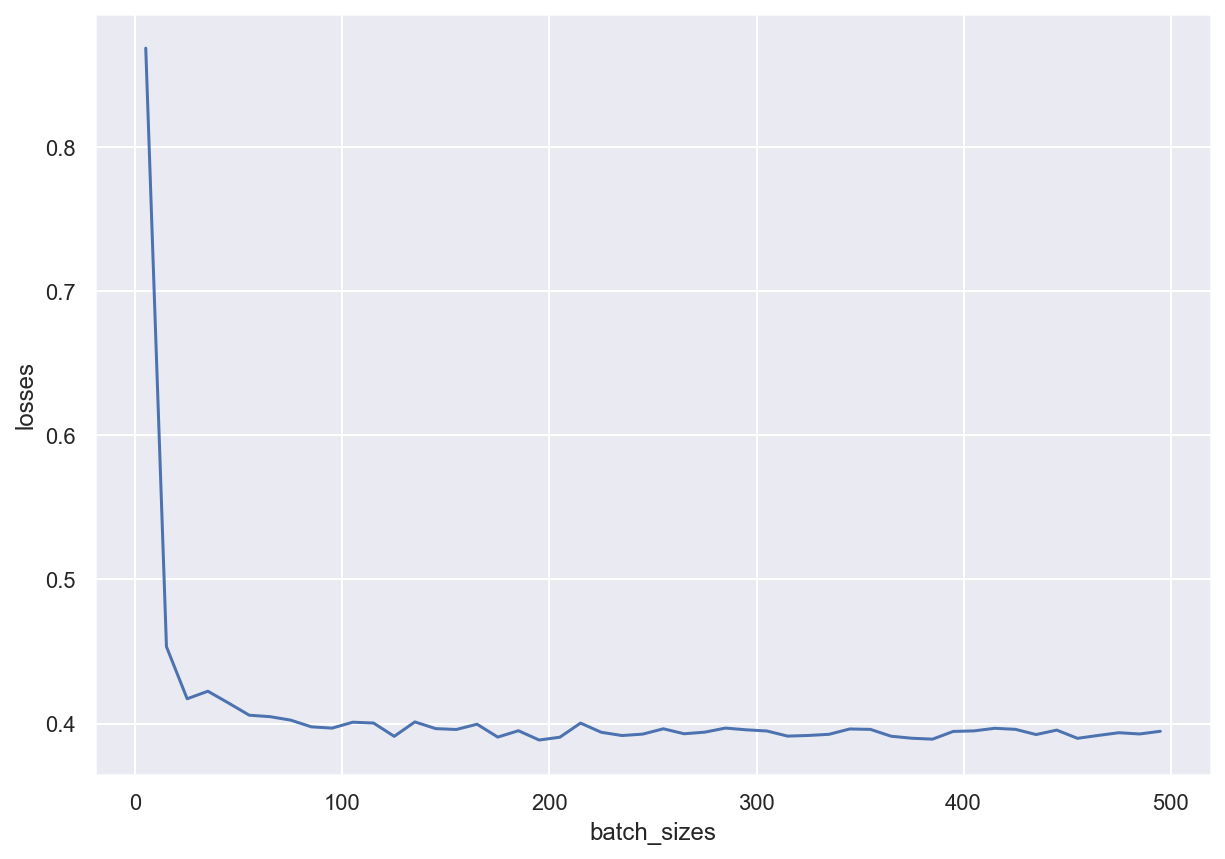

In [230]:
plt.plot(batch_sizes, losses)
plt.xlabel('batch_sizes')
plt.ylabel('losses')
plt.show()

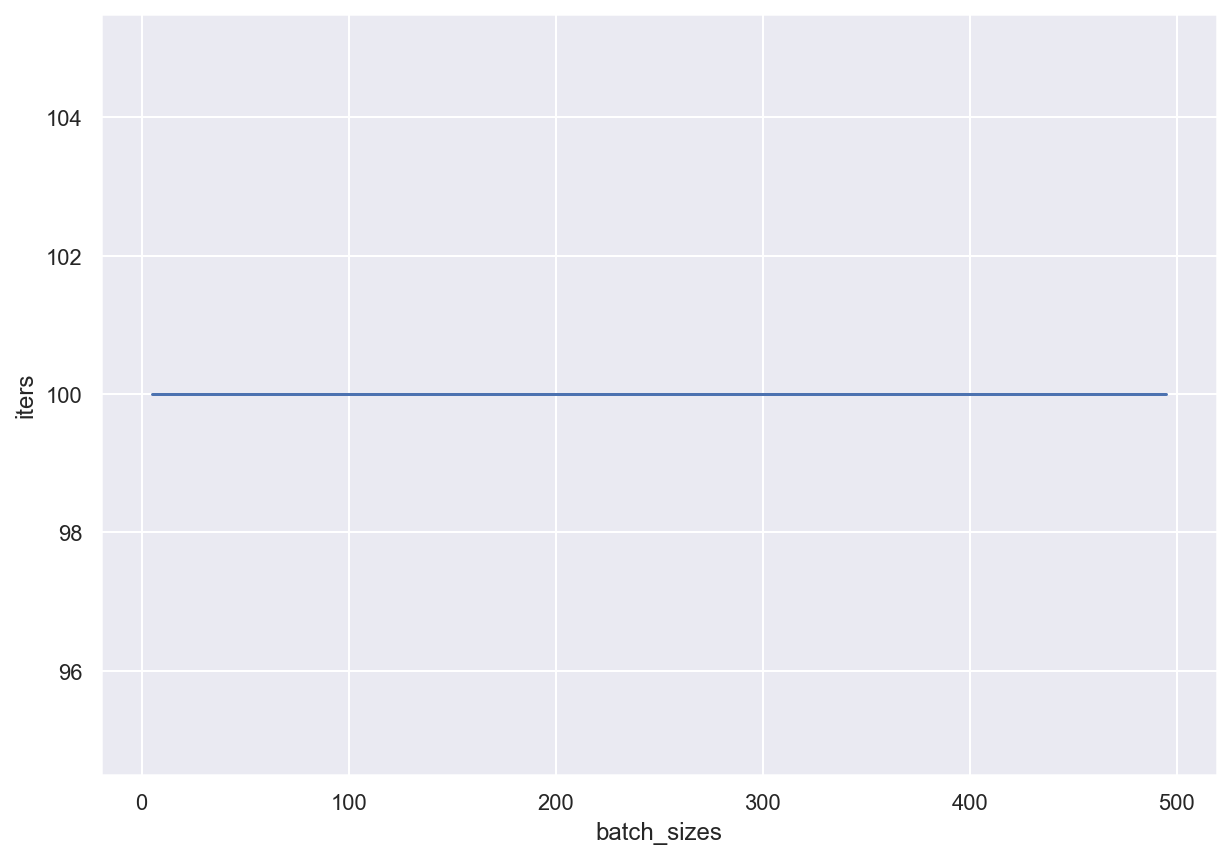

In [231]:
plt.plot(batch_sizes, iters)
plt.xlabel('batch_sizes')
plt.ylabel('iters')
plt.show()

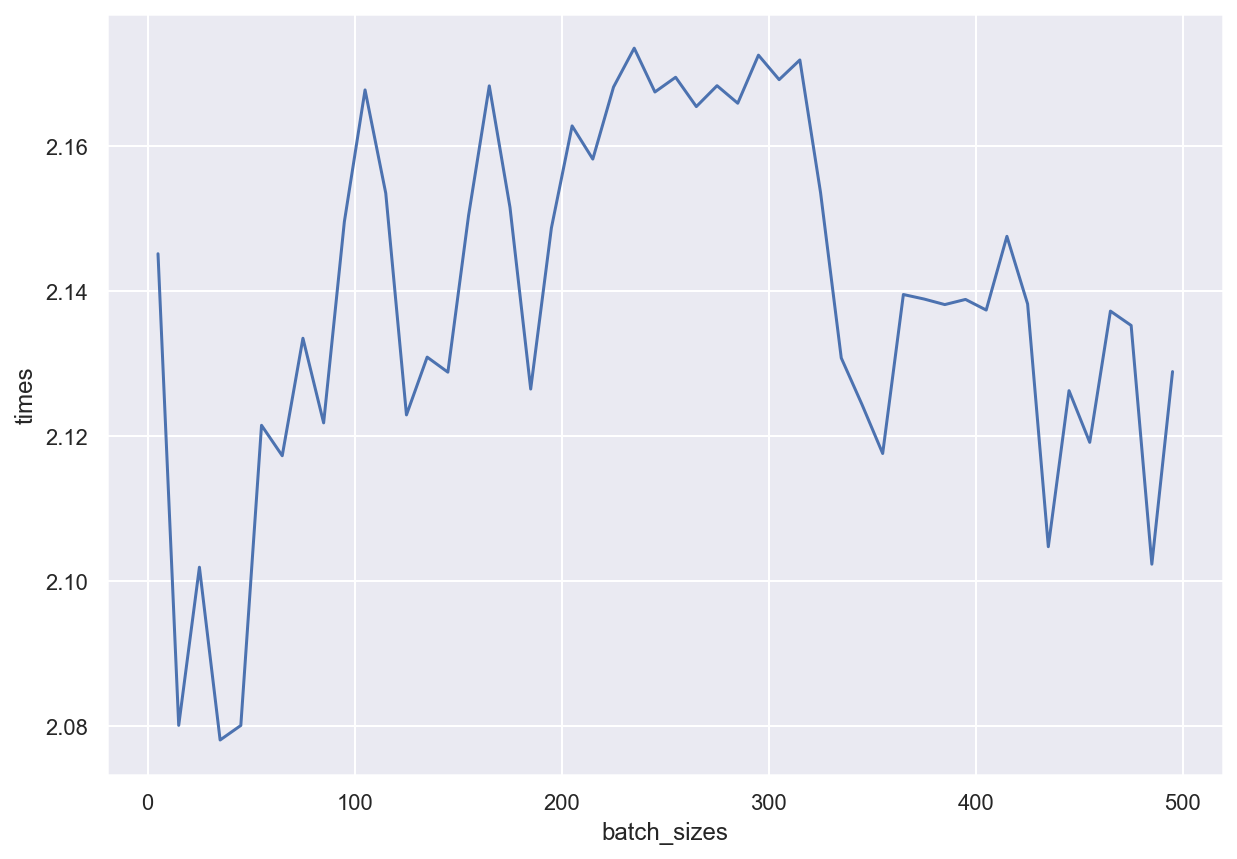

In [232]:
plt.plot(batch_sizes, times)
plt.xlabel('batch_sizes')
plt.ylabel('times')
plt.show()

Чтобы адекватно оцениить сходимость нужно поставить большой `max_iter`, но тогда код будет работать очень долго, либо поставить значение `tolerance`, но какое ставить не оч понятно(посоветовался с авторитетными людьми и поставил 1e-10). Если брать banch_size = 100, то будет сходиться к средней ошибке.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/73685430/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# до дедлайна 15 мин так что
# max_iter = 50
# tolerance = 10**-9

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

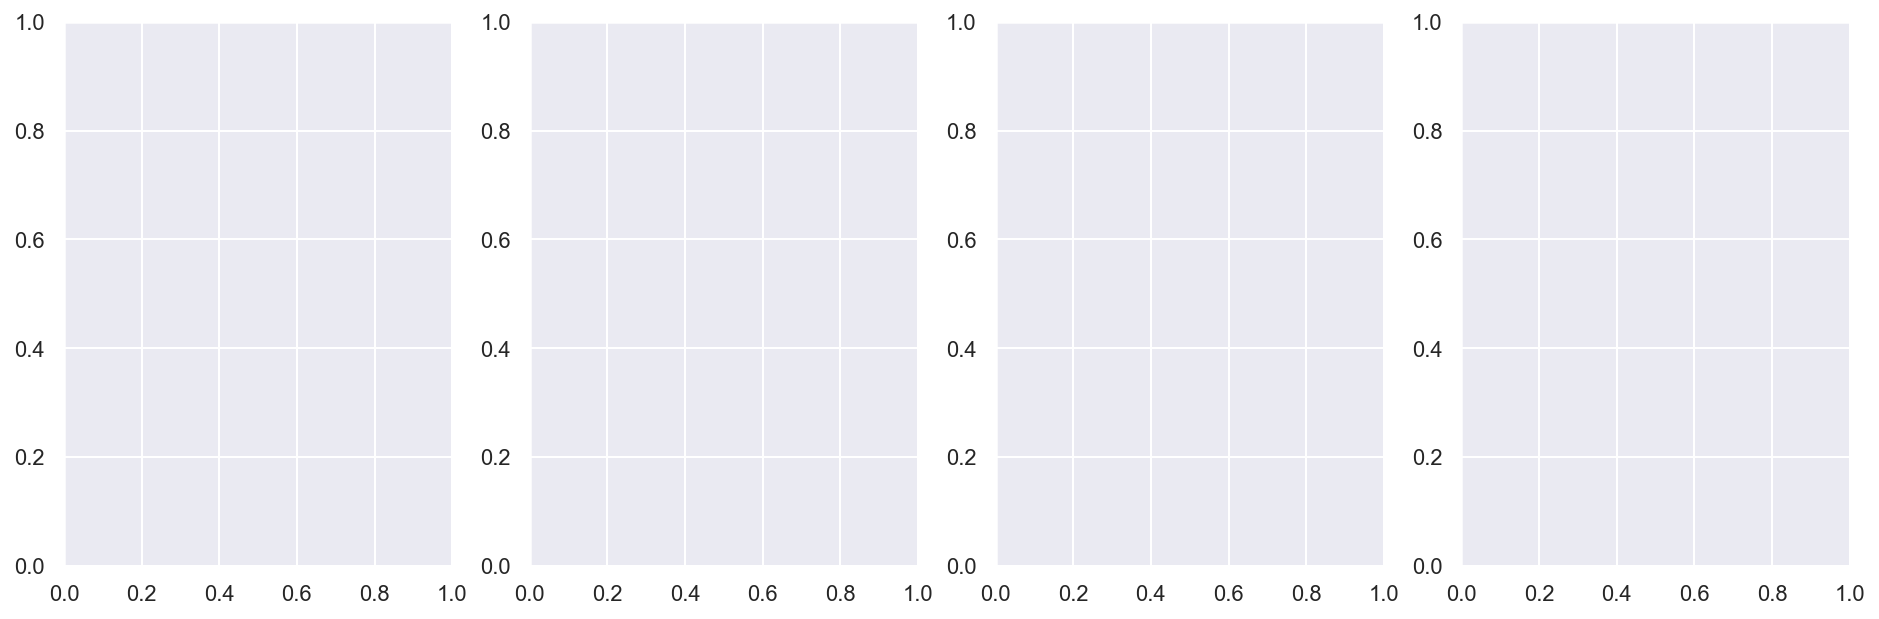

In [236]:
max_iter = 500
tolerance = 10**-10

lambdas = np.logspace(-4, 1, 50)
mus = np.logspace(-2, 1, 50)

best_lambdas = {}
best_mus = {}

fig, axs = plt.subplots(figsize=(16, 5), ncols=4)
i = 0
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    loss_list = []
    best_lambda = 1
    best_mu = 1
    min_loss = 777
    for mu in mus:
        min_loss_mu = 777
        loss_list = []
        for lambda_ in lambdas:
            descent_config = {
                'regularized': True,
                'kwargs': {
                    'dimension': X_val.shape[1],
                    'lambda_': lambda_,
                    'mu': mu
                }
            }
            descent_config['descent_name'] = descent_name

            regression = LinearRegression(
                descent_config=descent_config,
                tolerance=tolerance,
                max_iter=max_iter
            )

            regression.fit(X_val, np.array(y_val))
            loss = regression.calc_loss(X_val, np.array(y_val))
            if loss < min_loss:
                best_mu = mu
                best_lambda = lambda_
                min_loss = loss
            if loss < min_loss_mu:
                min_loss_mu = loss
        loss_list.append(min_loss_mu)
    best_lambdas[descent_name] = best_lambda
    best_mus[descent_name] = best_mu
    axs[i].plot(mus, loss_list)
    axs[i].set_xlabel('mus')
    axs[i].set_ylabel('loss')
    axs[i].set_ylim([0, 100])
    axs[i].set_title(descent_name)
    i += 1
    print(descent_name, best_lambda)
    
plt.tight_layout() 

In [ ]:
max_iter = 5000
tolerance = 10 ** -10

iters_train = {}
iters_test = {}

losses_train = {}
losses_test = {}

preds_train = {}
preds_test = {}


progress = 0

print('train')



for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_lambda = best_lambdas[descent_name]
    best_mu = best_mus[descent_name]

    descent_config = {
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': best_lambda,
            'mu': mu
        }
    }
    descent_config['descent_name'] = descent_name
    
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    regression.fit(X_train, np.array(y_train))
    iters_train[descent_name] = len(regression.loss_history) - 1
    losses_train[descent_name] = regression.loss_history[-1]
    preds_train[descent_name] = regression.predict(X_train)
    
    print('done')


print('test')

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_lambda = best_lambdas[descent_name]
    best_mu = best_mus[descent_name]

    descent_config = {
        'kwargs': {
            'dimension': X_test.shape[1],
            'lambda_': best_lambda,
            'mu': mu
        }
    }
    descent_config['descent_name'] = descent_name
    
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    regression.fit(X_test, np.array(y_test))
    iters_test[descent_name] = len(regression.loss_history) - 1
    losses_test[descent_name] = regression.loss_history[-1]    
    preds_test[descent_name] = regression.predict(X_test)

    print('done')
 



In [ ]:
train = pd.DataFrame()
train['name'] = ['full', 'stochastic', 'momentum', 'adam']
train['iters'] = 0
train['loss'] = 0
train['r2_score'] = 0

for name in ['full', 'stochastic', 'momentum', 'adam']:
    train.loc[train['name'] == name, 'iters'] = iters_train[name]
    train.loc[train['name'] == name, 'loss'] = losses_train[name]    
    train.loc[train['name'] == name, 'r2_score'] = r2_score(y_train, preds_train[name])

train

In [ ]:
test = pd.DataFrame()
test['name'] = ['full', 'stochastic', 'momentum', 'adam']
test['iters'] = 0
test['loss'] = 0
test['r2_score'] = 0

for name in ['full', 'stochastic', 'momentum', 'adam']:
    test.loc[test['name'] == name, 'iters'] = iters_test[name]
    test.loc[test['name'] == name, 'loss'] = losses_test[name]    
    test.loc[test['name'] == name, 'r2_score'] = r2_score(y_test, preds_test[name])

test

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Пока ждал, когда досчитается пункт 6, сьездил к другу и насильно накормил его вот этой штукой. Это тушенная курица с зеленью, которая лежит на помидорах + посыпана сыром. В целом, оно в разы более невкусное, чем может показаться по фото, что видно по выражению лица на 2 фото. Радует ток 1 - когда я вернулся домой, 6 задача досчиталась(а представьте чтобы было если бы я поставил там большее кол-во шагов, чтобы увидеть сходимость)

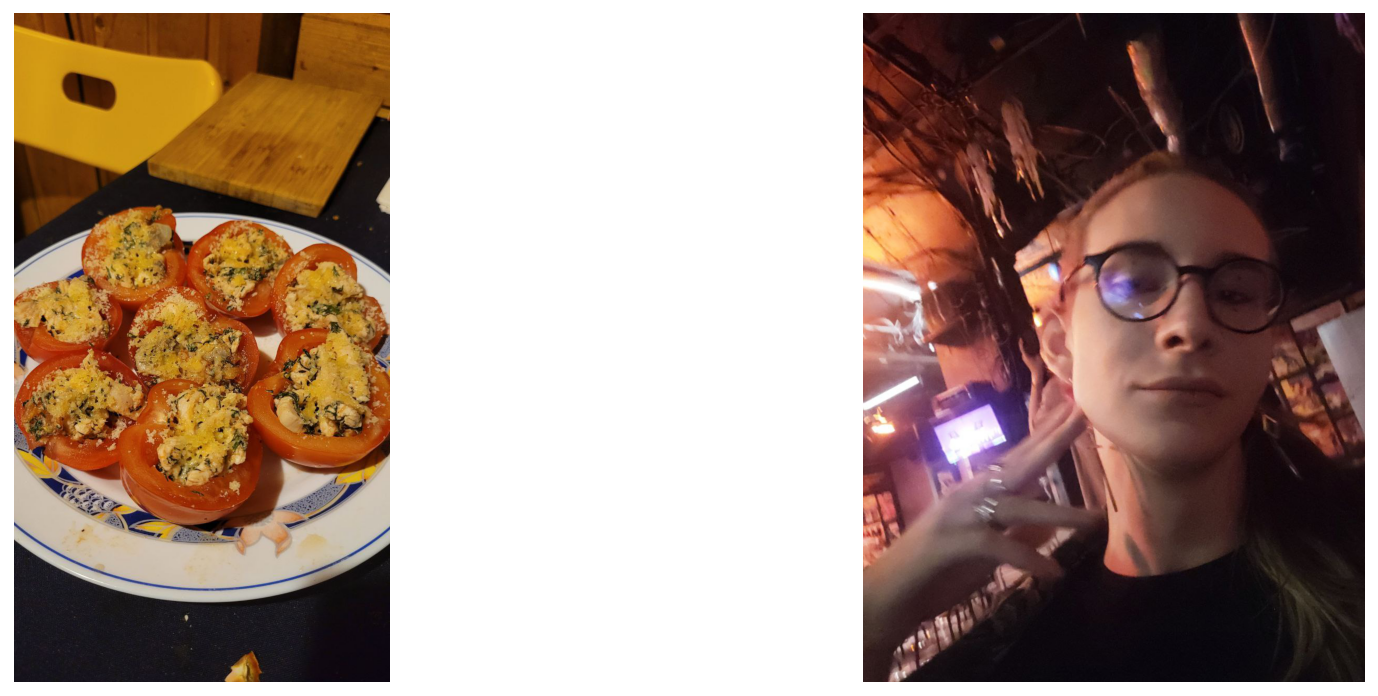

In [149]:
from PIL import Image
food = Image.open('food.jpg')
photo = Image.open('photo.jpg')

fig, axs = plt.subplots(figsize=(16, 5), ncols=2)


axs[0].imshow(food)
axs[1].imshow(photo)

axs[1].axis('off')
axs[0].axis('off')



plt.tight_layout() 

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: